<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Problemas_de_Strum_liouville_con_Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problemas de Strum-Liouville son Sympy
Este notebook dos problemas clásicos de Strum-Lioville utilizando la librería "SymPy" de Python, automatizando lo más posible el proceso y graficando algunas soluciones.

##Objetivo
Realizar simbolicamente y graficar los siguientes problemas:

1. $ X´´+ KX = 0$ con $X(0) =X(1)=0$
2.  $ X´´+ KX = 0$ con $X´(0) =X´(1)=0$

Ambos son problemas de valores propios que aparecen al resolver las ecuaciones en diferenciales parciales.  

In [37]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as ptl
from scipy.integrate import solve_bvp

sp.init_printing()

## Problema 1-  Sturm–Liouville con condiciones de frontera Dirichlet

Buscamos los valores de \( k \) para los cuales la ecuación diferencial
$
X''(x) + k X(x) = 0$

tiene soluciones no triviales que satisfacen las condiones de frontera
$
X(0) = X(1) = 0
$

Este es un problema de valores propios. Su solución se basa en encontrar los valores de $ k $ (eigenvalores) y las funciones $X(x)$ correspondientes (eigenfunciones).

Usaremos SymPy para obtener la solución general con `dsolve`, y luego aplicamos las condiciones de frontera para encontrar los valores de k que permiten soluciones no triviales

 Parte simbólica: resolver con `dsolve`

In [38]:

#Definir las variables simbolicas

x,k= sp.symbols("x k", real=True)
X=sp.Function("X")

#Definimos la ecuación diferencial
edo1= sp.Eq(sp.Derivative( X(x), x , 2) +k*X(x), 0)

#Solucion general con dsolve

sol1=sp.dsolve(edo1, X(x))
sol1

                ____           ____
           -x⋅╲╱ -k        x⋅╲╱ -k 
X(x) = C₁⋅ℯ          + C₂⋅ℯ        

Dado que las raices son complejas es posible escribir la solución en terminos de senos y cosenos.
Esta expresión nos permite aplicar las condiciones.

In [39]:
# Reescribimos la solución como combinación de sin y cos para imponer condiciones fácilmente (forma típica en Sturm–Liouville)
C1, C2 = sp.symbols('C1 C2')
X_expr = C1 * sp.sin(sp.sqrt(k)*x) + C2 * sp.cos(sp.sqrt(k)*x)
X_expr

C₁⋅sin(√k⋅x) + C₂⋅cos(√k⋅x)

## Análisis simbólico de condiciones de frontera

Aplicamos las condiciones de frontera:

- $X(0) = 0 \Rightarrow C_2 = 0$
- $X(1) = 0 \Rightarrow \sin(\sqrt{k})= 0$

Por lo tanto:
$
\sqrt{k} = n\pi \Rightarrow k = (n\pi)^2
$

Los valores propios son:
$k_n = (n\pi)^2,\quad n = 1, 2, 3, \dots $

Y las funciones propias correspondientes son:
$X_n(x) = \sin(n\pi x)$



Aplicamos condiones de frontera



In [40]:
# Aplicamos condiciones de frontera
cond_0 = X_expr.subs(x, 0)      # Esto nos da C2 = 0
cond_1 = X_expr.subs({x: 1, C2: 0})  # Queda C1*sin(sqrt(k)) = 0


# Aplicando condiciones de frontera:
# X(0) = 0 implica C2 = 0
# X(1) = 0 implica sin(sqrt(k)) = 0 → sqrt(k) = nπ → k = (nπ)^2


# Simplificamos ecuación para obtener valores propios
eq_k = sp.Eq(sp.sin(sp.sqrt(k)), 0)
eq_k

sin(√k) = 0

Eigenvalores y eigenfunciones.Es decir encontramos los valores propios (valores de k)

In [41]:
# Obtenemos la expresión de los valores propios
n = sp.symbols('n', integer=True, positive=True)
k_n = (n * sp.pi)**2
Xn = sp.sin(n * sp.pi * x)

display(sp.Eq(sp.Symbol('k_n'), k_n))
display(sp.Eq(sp.Function('X_n')(x), Xn))


      2  2
kₙ = π ⋅n 

Xₙ(x) = sin(π⋅n⋅x)

Graficar las funciones propias

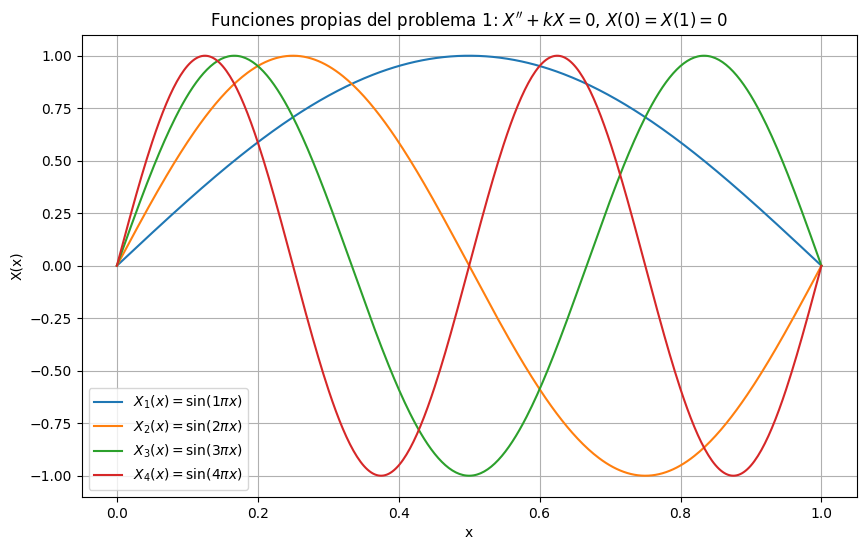

In [21]:
import matplotlib.pyplot as plt
# Graficamos Xn(x) = sin(nπx) para n = 1, 2, 3, 4
x_vals = np.linspace(0, 1, 400)

plt.figure(figsize=(10,6))
for n_val in range(1, 5):
    y_vals = np.sin(n_val * np.pi * x_vals)
    plt.plot(x_vals, y_vals, label=f"$X_{n_val}(x) = \sin({n_val}\pi x)$")

plt.title("Funciones propias del problema 1: $X'' + kX = 0$, $X(0)=X(1)=0$")
plt.xlabel("x")
plt.ylabel("X(x)")
plt.grid(True)
plt.legend()
plt.show()
